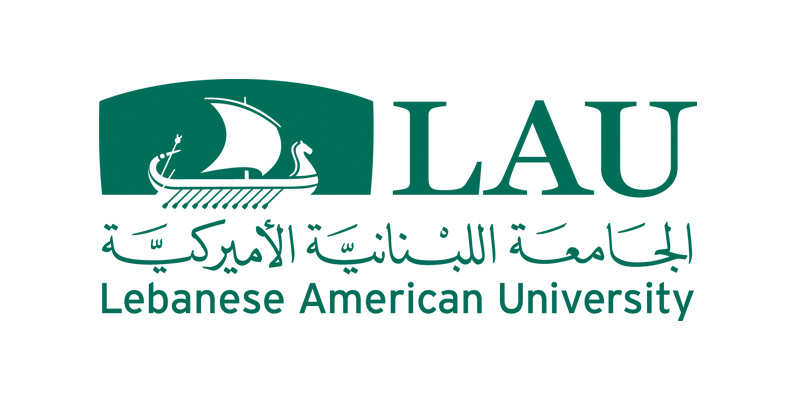

#  CSC498 Natural Language Processing  - Assignment 1
## Dr. Pauline Mouawad

## Prepared By Moussa Zoghaib - 201701804 and Slaiby AlMallah - 201703726

### Exercise 1 Regex

In [1]:
import nltk

from nltk import sent_tokenize, word_tokenize
import re  # regular expression module

from nltk.corpus import wordnet 

    a) The set of all strings from the alphabet {a, b} such that each a is immediately
    preceded by and immediately followed by a b

In [19]:
print(re.search(r'((^b)(ab|b)*)',"bababbababab").group(0))
print(re.search(r'((^b)(ab|b)*)',"abaab")) #no match not every a is surrounded by b

bababbababab
None


    b) Write a Python program to remove lowercase substrings from a given string. Test it on
    string: “KDeoBNBklvVHuipfLLaeioU”.

In [2]:
"".join(re.findall(r'([^a-z])', "KDeoBNBklvVHuipfLLaeioU"))

'KDBNBVHLLU'

     c) Match a string of any length and any character

In [3]:
print(re.search(r'.*',"bob").group(0))
print(re.search(r'.*',"natrual language processing").group(0))
print(re.search(r'.*',"$$^@Yndjwnijdnw @*(#*@3b  djwdbwdb )) hotdog2325362").group(0))

bob
natrual language processing
$$^@Yndjwnijdnw @*(#*@3b  djwdbwdb )) hotdog2325362


    d)     The set of consecutive repeated words, such as “ciao ciao sigñorina” or “so very very
    far away”:
    i. After matching consecutive repeated words, remove the duplicate word (i.e.
    occurring second). To this end, you may use the substitution function of the re
    package. The function’s prototype is:
    1. re.sub(pattern, repl, string) where pattern is the string to replace,
    repl is the replacement string, and string is the sample sentence you’re
    searching in

In [65]:
sentence = "bella bella bella bella ciao ciao sigñorina"

sentence = re.sub(r'\b(\w+)( \1\b)+', r'\1', sentence)
    
print(sentence)

bella ciao sigñorina


    e. To search the numbers (0-9) of length between 1 to 3 in a given string. Test it on the
    string: “Busy people fact: 2, 8, 27, 34, 090, 828. You were too busy to read that number.”

In [4]:
re.findall(r'[0-9]{1,3}',"Busy people fact: 2, 8, 27, 34, 090, 828. You were too busy to read that number.")

['2', '8', '27', '34', '090', '828']

    f. The re.compile(pattern, repl, string) converts a string pattern into a
    RegexObject, which separates the definition of the regex from its use. This is useful
    for pattern matching, as you may use the object to search for the same pattern again
    without having to rewrite it.
    i. Repeat question (d) using re.compile.


In [5]:
#### re.compile does not take 3 arguments  ----re.compile(pattern, repl, string) => error-------
sentence = re.compile(r'\b(\w+)( \1\b)+', r'\1', sentence)

NameError: name 'sentence' is not defined

In [7]:
pattern = re.compile(r'\b(\w+)( \1\b)+')
pattern.sub(r'\1',sentence)

NameError: name 'sentence' is not defined

    g. Write a Python regex that matches a word at the end of a string, with optional
    punctuation. Test it on the following two sample sequences:
    “If one is lucky, a solitary fantasy can totally transform one million realities.”
    “If one is lucky, a solitary fantasy can totally transform one million realities. ”

In [90]:
print(re.search(r'\w+[?!.]?$',"If one is lucky, a solitary fantasy can totally transform one million realities.").group())
print(re.match(r'\w+[?!.]?$',"If one is lucky, a solitary fantasy can totally transform one million realities. "))# no match

realities.
None


    h)Write a function to convert a date format from: yyyy-mm-dd to dd-mm-yyyy

In [87]:
def changeDateFormat(Date):
    match = re.search((r'(\d{4})-(\d{2})-(\d{2})'), Date)
    sep = "-"

    year = match.group(1)
    month = match.group(2)
    day = match.group(3)

    return day+sep+month+sep+year
    
changeDateFormat('2020-02-24')

'24-02-2020'

    i. Write a regex to remove words in a string, having length between 1 and 3. Test it on
    the following sentence: “The black horse neighs to the fearful fox.”

In [106]:
sentence = "The black horse neighs to the fearful fox."
match = re.compile(r'(\b\w{1,3}\b)')
match.sub(r'', sentence)

' black horse neighs   fearful .'

    j. Write a regex to remove all whitespaces from a string.

In [8]:
"".join(re.findall(r'([^\s])', "hello my name is slaiby and i like to code")) 

'hellomynameisslaibyandiliketocode'

    k. Compare the similarity of the two verbs: “remain” and “prevail”.
    i. Provide a definition to each.
    ii. Measure the similarity between the two.

In [112]:
firstVerb = "remain"
secondVerb = "prevail"

firstWord = wordnet.synsets(firstVerb)
secondWord = wordnet.synsets(secondVerb)

print(firstVerb +  ": " + firstWord[0].definition())
print(secondVerb +  ": " + secondWord[0].definition())

v1 = wordnet.synset(firstVerb+'.v.01')
v2 = wordnet.synset(secondVerb+'.v.01')
v1.wup_similarity(v2)

remain: stay the same; remain in a certain state
prevail: be larger in number, quantity, power, status or importance


0.4

## Exercise 2 Text Processing

#### some problems have been solved out of order because they depend on each other,  i.e. tokenization was implemented before the
#### removal of punctuation because the tokenizer depends on punctuation to properly tokenize

In [181]:
import re
from nltk import word_tokenize 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg as g #import gutenberg corpus
import string

    a. Load a text file of your choice from the Gutenberg corpus.

In [170]:
textName = g.fileids()[17]

    b. Print a sample of the raw text.

In [171]:
text = g.raw(textName)
print(text)

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I Sing

One's-self I sing, a simple separate person,
Yet utter the word Democratic, the word En-Masse.

Of physiology from top to toe I sing,
Not physiognomy alone nor brain alone is worthy for the Muse, I say
    the Form complete is worthier far,
The Female equally with the Male I sing.

Of Life immense in passion, pulse, and power,
Cheerful, for freest action form'd under the laws divine,
The Modern Man I sing.



}  As I Ponder'd in Silence

As I ponder'd in silence,
Returning upon my poems, c

    c. Convert the entire text to lowercase

In [177]:
text = text.lower()

    d. Remove all the numbers, if any.

In [179]:
text = ''.join([i for i in text if not i.isdigit()])
print(text)

[leaves of grass by walt whitman ]


come, said my soul,
such verses for my body let us write, (for we are one,)
that should i after return,
or, long, long hence, in other spheres,
there to some group of mates the chants resuming,
(tallying earth's soil, trees, winds, tumultuous waves,)
ever with pleas'd smile i may keep on,
ever and ever yet the verses owning--as, first, i here and now
signing for soul and body, set to them my name,

walt whitman



[book i.  inscriptions]

}  one's-self i sing

one's-self i sing, a simple separate person,
yet utter the word democratic, the word en-masse.

of physiology from top to toe i sing,
not physiognomy alone nor brain alone is worthy for the muse, i say
    the form complete is worthier far,
the female equally with the male i sing.

of life immense in passion, pulse, and power,
cheerful, for freest action form'd under the laws divine,
the modern man i sing.



}  as i ponder'd in silence

as i ponder'd in silence,
returning upon my poems, consi

    i. Implement sentence tokenization.

In [175]:
sent_token = nltk.sent_tokenize(text)
sent_token

["[leaves of grass by walt whitman 1855]\n\n\ncome, said my soul,\nsuch verses for my body let us write, (for we are one,)\nthat should i after return,\nor, long, long hence, in other spheres,\nthere to some group of mates the chants resuming,\n(tallying earth's soil, trees, winds, tumultuous waves,)\never with pleas'd smile i may keep on,\never and ever yet the verses owning--as, first, i here and now\nsigning for soul and body, set to them my name,\n\nwalt whitman\n\n\n\n[book i.  inscriptions]\n\n}  one's-self i sing\n\none's-self i sing, a simple separate person,\nyet utter the word democratic, the word en-masse.",
 'of physiology from top to toe i sing,\nnot physiognomy alone nor brain alone is worthy for the muse, i say\n    the form complete is worthier far,\nthe female equally with the male i sing.',
 "of life immense in passion, pulse, and power,\ncheerful, for freest action form'd under the laws divine,\nthe modern man i sing.\n\n\n\n}",
 "as i ponder'd in silence\n\nas i pon

    j. Implement word tokenization.

In [176]:
Tokens = [word_tokenize(t) for t in sent_token]
print(Tokens)

[['[', 'leaves', 'of', 'grass', 'by', 'walt', 'whitman', '1855', ']', 'come', ',', 'said', 'my', 'soul', ',', 'such', 'verses', 'for', 'my', 'body', 'let', 'us', 'write', ',', '(', 'for', 'we', 'are', 'one', ',', ')', 'that', 'should', 'i', 'after', 'return', ',', 'or', ',', 'long', ',', 'long', 'hence', ',', 'in', 'other', 'spheres', ',', 'there', 'to', 'some', 'group', 'of', 'mates', 'the', 'chants', 'resuming', ',', '(', 'tallying', 'earth', "'s", 'soil', ',', 'trees', ',', 'winds', ',', 'tumultuous', 'waves', ',', ')', 'ever', 'with', 'pleas', "'d", 'smile', 'i', 'may', 'keep', 'on', ',', 'ever', 'and', 'ever', 'yet', 'the', 'verses', 'owning', '--', 'as', ',', 'first', ',', 'i', 'here', 'and', 'now', 'signing', 'for', 'soul', 'and', 'body', ',', 'set', 'to', 'them', 'my', 'name', ',', 'walt', 'whitman', '[', 'book', 'i.', 'inscriptions', ']', '}', "one's-self", 'i', 'sing', "one's-self", 'i', 'sing', ',', 'a', 'simple', 'separate', 'person', ',', 'yet', 'utter', 'the', 'word', 'de

    e. Remove punctuations from the text, such as “.?!”, but also remove characters like
    “@$#”

In [183]:
no_punc_tok = []

for T in Tokens:
    no_punc_tok.append([token for token in T if token not in string.punctuation])
    
print(no_punc_tok)

[['leaves', 'of', 'grass', 'by', 'walt', 'whitman', '1855', 'come', 'said', 'my', 'soul', 'such', 'verses', 'for', 'my', 'body', 'let', 'us', 'write', 'for', 'we', 'are', 'one', 'that', 'should', 'i', 'after', 'return', 'or', 'long', 'long', 'hence', 'in', 'other', 'spheres', 'there', 'to', 'some', 'group', 'of', 'mates', 'the', 'chants', 'resuming', 'tallying', 'earth', "'s", 'soil', 'trees', 'winds', 'tumultuous', 'waves', 'ever', 'with', 'pleas', "'d", 'smile', 'i', 'may', 'keep', 'on', 'ever', 'and', 'ever', 'yet', 'the', 'verses', 'owning', '--', 'as', 'first', 'i', 'here', 'and', 'now', 'signing', 'for', 'soul', 'and', 'body', 'set', 'to', 'them', 'my', 'name', 'walt', 'whitman', 'book', 'i.', 'inscriptions', "one's-self", 'i', 'sing', "one's-self", 'i', 'sing', 'a', 'simple', 'separate', 'person', 'yet', 'utter', 'the', 'word', 'democratic', 'the', 'word', 'en-masse'], ['of', 'physiology', 'from', 'top', 'to', 'toe', 'i', 'sing', 'not', 'physiognomy', 'alone', 'nor', 'brain', 'a

    f. Show the size of the vocabulary, i.e. the number of distinct words.


In [186]:
words = []
for sentence in no_punc_tok:
    words+= sentence

len(set(words))

13725

    g. Compute the lexical diversity of the text.


In [187]:
print(len(words) / len(set(words)))
print(len(words) // len(set(words)))

9.1583970856102
9


    h. Plot the top 30 most frequently used words.


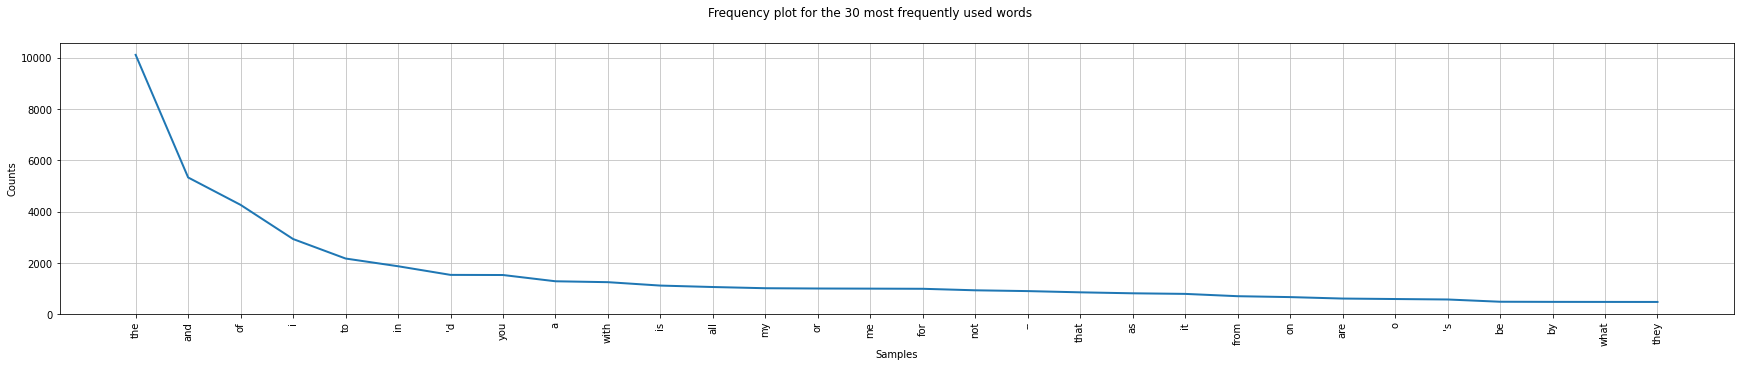

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [191]:
from nltk.probability import FreqDist
fdist1 = FreqDist(words)
fdist1

fig = plt.figure(figsize=(30, 5)) 
fig.suptitle("Frequency plot for the 30 most frequently used words")


fdist1.plot(30,cumulative=False)

    k. Remove stop words.


In [195]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
no_stopwords= []

for T in no_punc_tok:
    no_stopwords.append([token for token in T if token not in stop_words])

print(no_stopwords)

[['leaves', 'grass', 'walt', 'whitman', '1855', 'come', 'said', 'soul', 'verses', 'body', 'let', 'us', 'write', 'one', 'return', 'long', 'long', 'hence', 'spheres', 'group', 'mates', 'chants', 'resuming', 'tallying', 'earth', "'s", 'soil', 'trees', 'winds', 'tumultuous', 'waves', 'ever', 'pleas', "'d", 'smile', 'may', 'keep', 'ever', 'ever', 'yet', 'verses', 'owning', '--', 'first', 'signing', 'soul', 'body', 'set', 'name', 'walt', 'whitman', 'book', 'i.', 'inscriptions', "one's-self", 'sing', "one's-self", 'sing', 'simple', 'separate', 'person', 'yet', 'utter', 'word', 'democratic', 'word', 'en-masse'], ['physiology', 'top', 'toe', 'sing', 'physiognomy', 'alone', 'brain', 'alone', 'worthy', 'muse', 'say', 'form', 'complete', 'worthier', 'far', 'female', 'equally', 'male', 'sing'], ['life', 'immense', 'passion', 'pulse', 'power', 'cheerful', 'freest', 'action', 'form', "'d", 'laws', 'divine', 'modern', 'man', 'sing.'], ['ponder', "'d", 'silence', 'ponder', "'d", 'silence', 'returning',

    l. Lemmatize the ‘verbs’ only in the text.


In [199]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = []

for T in no_stopwords:
    lemmatized.append([lemmatizer.lemmatize(word, pos='v') for word in T])

print (lemmatized)


[['leave', 'grass', 'walt', 'whitman', '1855', 'come', 'say', 'soul', 'verse', 'body', 'let', 'us', 'write', 'one', 'return', 'long', 'long', 'hence', 'spheres', 'group', 'mat', 'chant', 'resume', 'tally', 'earth', "'s", 'soil', 'tree', 'wind', 'tumultuous', 'wave', 'ever', 'pleas', "'d", 'smile', 'may', 'keep', 'ever', 'ever', 'yet', 'verse', 'own', '--', 'first', 'sign', 'soul', 'body', 'set', 'name', 'walt', 'whitman', 'book', 'i.', 'inscriptions', "one's-self", 'sing', "one's-self", 'sing', 'simple', 'separate', 'person', 'yet', 'utter', 'word', 'democratic', 'word', 'en-masse'], ['physiology', 'top', 'toe', 'sing', 'physiognomy', 'alone', 'brain', 'alone', 'worthy', 'muse', 'say', 'form', 'complete', 'worthier', 'far', 'female', 'equally', 'male', 'sing'], ['life', 'immense', 'passion', 'pulse', 'power', 'cheerful', 'freest', 'action', 'form', "'d", 'laws', 'divine', 'modern', 'man', 'sing.'], ['ponder', "'d", 'silence', 'ponder', "'d", 'silence', 'return', 'upon', 'poems', 'consi

    m. pyspellchecker is a Python package that allows you to perform spelling
    corrections, as well as see candidate spellings for a misspelled word. Install
    pyspellchecker on your computer, and then import it:
    i. from spellchecker import SpellChecker
    spell = SpellChecker()
    ii. Load any sentence from your text into string checksent, and using
    function correction(str), check if there are any misspelled words.
    Hint. Test the function on any sentence such as:
    “Do you percieve that this sentnce has mispelled werds”.

In [209]:
from spellchecker import SpellChecker

spell = SpellChecker()
s = "Do you percieve that this sentnce has mispelled werds"
s = word_tokenize(s)
for w in s:
    print(spell.correction(w))

Do
you
perceive
that
this
sentence
has
dispelled
words
